In [2]:
import torch
from denoising_diffusion_pytorch import Unet, GaussianDiffusion

# if torch.backends.mps.is_available():
#     device = torch.device("mps")
if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

In [3]:
model = Unet(
    dim = 64,
    dim_mults = (1, 2, 4, 8)
).to(device)

diffusion = GaussianDiffusion(
    model,
    image_size = 128,
    timesteps = 1000,   # number of steps
    loss_type = 'l1'    # L1 or L2
).to(device)

training_images = torch.rand(8, 3, 128, 128).to(device) # images are normalized from 0 to 1
loss = diffusion(training_images)
loss.backward()
# after a lot of training

sampled_images = diffusion.sample(batch_size = 4)
sampled_images.shape # (4, 3, 128, 128)

sampling loop time step: 100%|██████████| 1000/1000 [27:06<00:00,  1.63s/it]


torch.Size([4, 3, 128, 128])

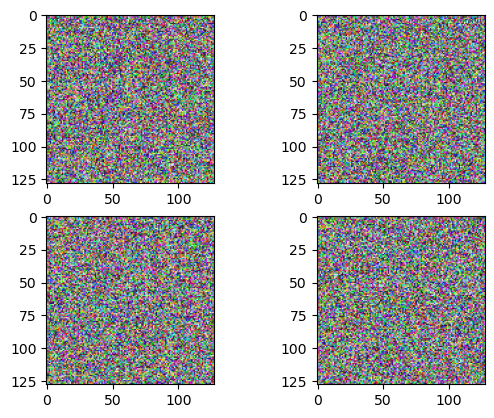

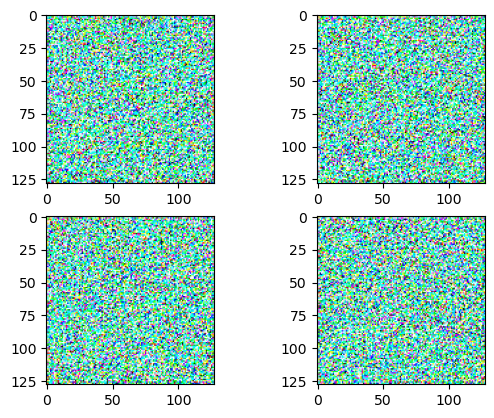

In [13]:
from utils.plot import visualize

visualize(training_images)
visualize(sampled_images)